# Exercise 2

## Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 

## Data preparation

In [2]:
csv_file_name = "advertising.csv"

In [3]:
def get_column(data, index):
    
    data = [row[index] for row in data]
    
    return data 

def prepare_data(file_name):
    data = np.genfromtxt(csv_file_name, delimiter=',', skip_header=True).tolist()
    N = len(data)
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X_data = [tv_data, radio_data, newspaper_data]
    y_data = sales_data
    
    return X_data, y_data

In [4]:
X_data, y_data = prepare_data(csv_file_name)

## Linear regression code

2.1)

In [5]:
def initialize_params_normal():
    w1 = random.gauss(mu=0, sigma=0.01)
    w2 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    b = 0
    return w1, w2, w3, b

def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b 

2.2)

In [6]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = x1 * w1 + x2 * w2 + x3 * w3 + b 
    return result

In [7]:
y = predict (x1 =1, x2 =1, x3 =1, w1 =0, w2 =0.5 , w3 =0, b =0.5)
print(y)

1.0


Q2: a) 1.0

2.3)

In [8]:
def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss 

In [9]:
l = compute_loss ( y_hat =1, y =0.5)
print(l)

0.25


Q3: a) 0.25

2.4)

In [10]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * xi * (y_hat - y)
    return dl_dwi 
def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db 

In [11]:
g_wi = compute_gradient_wi (xi =1.0 , y=1.0 , y_hat =0.5)
print(g_wi)

-1.0


Q4: a) -1.0

In [12]:
g_b = compute_gradient_b (y=2.0 , y_hat =0.5)
print (g_b)

-3.0


Q5: b) -3.0

2.5) 

In [13]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi 
def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b 

In [14]:
after_wi = update_weight_wi (wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


Q6: a) 1.000005

In [15]:
after_b = update_weight_b (b=0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )
print ( after_wi )

0.50001
1.000005


Q7: a) 0.50001

2.6) 

In [16]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y = y_data[i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            
            loss = compute_loss(y, y_hat)
            
            dl_dw1 = compute_gradient_wi(x1 , y, y_hat )
            dl_dw2 = compute_gradient_wi(x2 , y, y_hat )
            dl_dw3 = compute_gradient_wi(x3 , y, y_hat )
            dl_db = compute_gradient_b(y, y_hat )
            
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)
            
            losses.append(loss)
    
    return (w1, w2, w3, b, losses)

## Visualization and Comments

In [17]:
(w1, w2, w3, b, losses) = implement_linear_regression(X_data, y_data)

In [18]:
def visualize_loss(losses):  
    plt.plot(losses[:100])
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

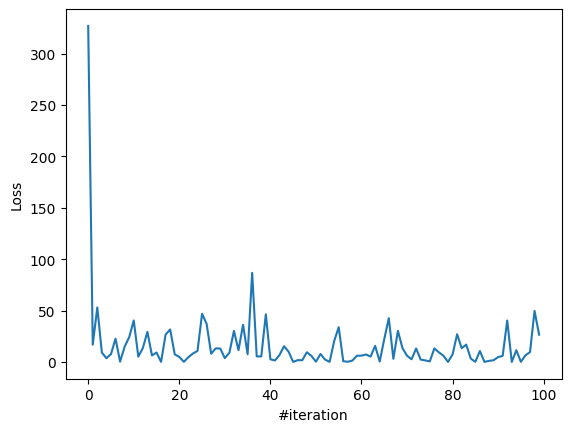

In [19]:
visualize_loss(losses)

In [20]:
print (w1 , w2 , w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


Q8: a) w1 = 0.074 , w2 = 0.15 , w3 = 0.17

In [22]:
tv = 19.2
radio = 35.9
newspaper = 51.3
(w1 ,w2 ,w3 ,b, losses ) = implement_linear_regression (X_data, y_data, epoch_max =50 , lr =1e-5)
sales = predict (tv , radio , newspaper , w1 , w2 , w3 , b)
print(f"Predicted sales: {sales}")

Predicted sales: 8.176413319549823


Q9: b) predicted sales is 8.18

2.7)

## MAE LOSS

In [29]:
def compute_loss_mae(y, y_hat):
    return np.abs(y_hat - y)

def compute_gradient_wi_mae(xi, y, y_hat):
    dl_dwi = np.sign(y_hat - y) * xi
    return dl_dwi

def compute_gradient_b_mae(y, y_hat):
    dl_db = np.sign(y_hat - y)
    return dl_db

def update_weight_wi_mae(w, dl_dw, lr):
    wi = w - lr * dl_dw 
    return wi 
    
def update_weight_b_mae(b, dl_db, lr):
    b = b - lr * dl_db
    return b     

In [30]:
def implement_linear_regression_MAE(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    
    w1, w2, w3, b = initialize_params()
    
    N = len(y_data)
    
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)
            y = y_data[i]
            
            # MAE Loss
            loss = compute_loss_mae(y, y_hat)
            
            dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
            dl_db = compute_gradient_b_mae(y, y_hat)
            
            w1 = update_weight_wi_mae(w1, dl_dw1, lr)
            w2 = update_weight_wi_mae(w2, dl_dw2, lr)
            w3 = update_weight_wi_mae(w3, dl_dw3, lr)       
            b = update_weight_b_mae(b, dl_db, lr)
            
            losses.append(loss)
            
    return (w1, w2, w3, b, losses)

In [31]:
(w1, w2, w3, b, losses) = implement_linear_regression_MAE(X_data, y_data)

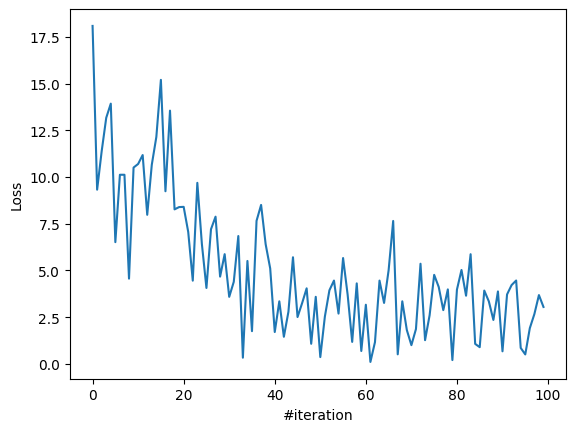

In [32]:
visualize_loss(losses)

In [33]:
l = compute_loss_mae ( y_hat =1, y =0.5)
print (l)

0.5


Q10: a) 0.5